In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import weightstats

# Author
## Yana Neykova

# Abstract

In this project I will analyse the effect of GPA on the people's weight.  
I will rely on the dataset "Food choices" . File is located in folder "data". For the online access, please refer to the "Resources" section.Following the link you can find some more information for the columns and their content , in case not everything is clear. Since the dataset contains a lot of information, I will focus only on the columns needed for my final conclusion.

<br> The structure of the project is as it follows:
<br> 1. Abstract
<br> 2. Correlation analysis
<br> 3. EDA - exploring the impact of GPA
<br> 4. Hypothesis testing
<br> 5. Conclusion
<br> 6. Further development
<br> 7. Resources
<br><br> I will start with reading and cleaning the dataset. Then I will try to find some correlation between the foods included. I will make some hypothesis testing, and eventually I will end up with a conclusion if there is a reliable connection between the GPAs and the people's weight.

In [3]:
food_choices = pd.read_csv('data/food_choices.csv')

In [4]:
food_choices.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [5]:
food_choices.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [6]:
food_choices.shape

(125, 61)

Looking at the columns above, I will need only part of them. Thus I will drop some so that I use only the data needed. I will overwrite the variable 'food_choices' with the changes.

In [7]:
food_choices = food_choices.drop(['calories_day', 'cook','cuisine', 'diet_current_coded','eating_changes_coded', 'eating_changes_coded1', 'eating_out',
                               'employment','ethnic_food', 'exercise', 'fav_cuisine_coded', 'greek_food',  'ideal_diet_coded', 'income','indian_food', 'italian_food', 'life_rewarding', 
                               'mother_education', 'nutritional_check', 'on_off_campus',
                               'parents_cook', 'pay_meal_out', 'persian_food','soup'], axis = 1)


In [8]:
food_choices.shape

(125, 37)

In [9]:
food_choices.dtypes

GPA                              object
Gender                            int64
breakfast                         int64
calories_chicken                  int64
calories_scone                  float64
coffee                            int64
comfort_food                     object
comfort_food_reasons             object
comfort_food_reasons_coded      float64
comfort_food_reasons_coded.1      int64
diet_current                     object
drink                           float64
eating_changes                   object
father_education                float64
father_profession                object
fav_cuisine                      object
fav_food                        float64
food_childhood                   object
fries                             int64
fruit_day                         int64
grade_level                       int64
healthy_feeling                   int64
healthy_meal                     object
ideal_diet                       object
marital_status                  float64


As we can see, the file is descreased now. I will work with the new file for the purposes of this analysis.

# Correlation analysis

<br>The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no relationship between the movement of the two variables.
<br> Let's check if there is any correlation between the foods in the dataset.

In [10]:
food_choices.corr()

,Gender,breakfast,calories_chicken,calories_scone,coffee,comfort_food_reasons_coded,comfort_food_reasons_coded.1,drink,father_education,fav_food,...,healthy_feeling,marital_status,self_perception_weight,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
Gender,1.000000,0.130527,-0.098265,1.548454e-01,-0.032178,0.168593,0.209109,0.203961,0.093358,-0.048478,...,0.061442,-0.135892,-0.221543,-1.958333e-01,-0.119846,0.217066,0.152039,-0.142901,-0.035668,0.147770
breakfast,0.130527,1.000000,-0.029597,3.065903e-02,-0.089756,0.017411,0.018233,0.213881,-0.115924,-0.000459,...,-0.043184,0.093300,-0.061754,-2.431904e-02,-0.118861,0.030242,-0.041046,-0.238174,0.092973,-0.036627
calories_chicken,-0.098265,-0.029597,1.000000,6.283472e-02,0.159031,-0.068259,-0.009311,-0.032772,0.008014,-0.014967,...,-0.201979,-0.138259,0.044320,-1.153660e-01,0.088459,0.381808,0.397642,0.152477,-0.196981,0.347542
calories_scone,0.154845,0.030659,0.062835,1.000000e+00,0.137510,0.266756,0.206879,0.003948,-0.159962,0.110847,...,0.102295,0.014052,-0.108605,-6.193208e-18,-0.245270,0.233255,-0.016898,-0.091141,-0.047728,0.364592
coffee,-0.032178,-0.089756,0.159031,1.375098e-01,1.000000,-0.051484,-0.055205,0.069785,0.093015,0.072345,...,0.029752,-0.153426,0.061485,3.745029e-03,0.173703,0.065235,0.061185,0.107468,-0.041804,0.071835
comfort_food_reasons_coded,0.168593,0.017411,-0.068259,2.667555e-01,-0.051484,1.000000,0.989180,0.021523,-0.103090,0.056798,...,-0.024115,0.049246,0.051773,1.692875e-01,-0.041233,0.027009,-0.041232,-0.127249,-0.076120,0.088816
comfort_food_reasons_coded.1,0.209109,0.018233,-0.009311,2.068789e-01,-0.055205,0.989180,1.000000,0.002709,-0.097048,0.110639,...,-0.047684,0.061837,-0.012464,1.288923e-01,-0.023196,0.042791,0.000043,-0.131472,-0.075948,0.090838
drink,0.203961,0.213881,-0.032772,3.948116e-03,0.069785,0.021523,0.002709,1.000000,0.022818,0.124562,...,0.047009,-0.028253,0.065261,-1.013043e-01,-0.112916,0.036127,0.072235,-0.201519,0.171022,0.045119
father_education,0.093358,-0.115924,0.008014,-1.599623e-01,0.093015,-0.103090,-0.097048,0.022818,1.000000,0.055100,...,0.029840,-0.145770,-0.069522,-5.035985e-02,0.026536,0.033228,0.049771,0.024917,0.094461,-0.064824
fav_food,-0.048478,-0.000459,-0.014967,1.108469e-01,0.072345,0.056798,0.110639,0.124562,0.055100,1.000000,...,0.126163,0.016509,0.210481,1.317688e-01,-0.082928,-0.011805,-0.102388,-0.265290,0.039706,-0.118540


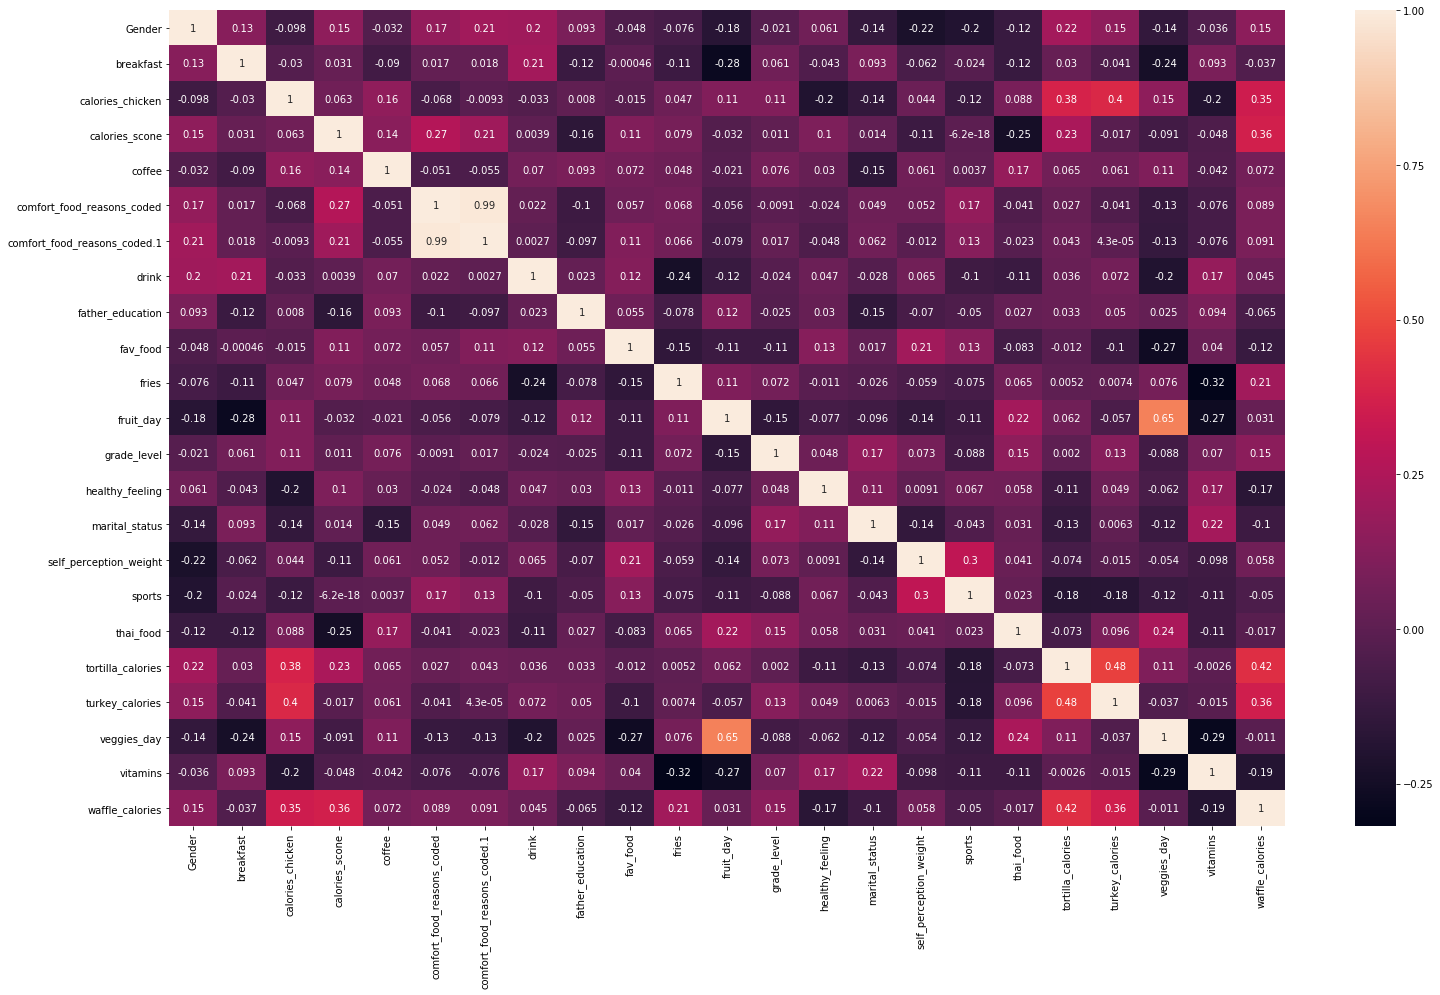

In [11]:
plt.figure(figsize=(25,15))
sns.heatmap(food_choices.corr(), annot = True)

The diagonal in the middle shows only values 1, as this is the correlation between one product with itself. Thus I am ignoring this line. I will also ignore the cells with corr=0.99 , since the two columns correlated are pretty much the same.
<br><br> I will focus on the highest correlation.For this purpose I will sort the correlation values and see which is the highest one, with the exclusion of corr=0.99 and corr=1.00.

In [12]:
correlation_values_desc = food_choices.corr().unstack().sort_values(kind="quicksort")

In [13]:
print(correlation_values_desc)

vitamins                      fries                          -0.318177
fries                         vitamins                       -0.318177
veggies_day                   vitamins                       -0.289955
vitamins                      veggies_day                    -0.289955
breakfast                     fruit_day                      -0.279577
fruit_day                     breakfast                      -0.279577
                              vitamins                       -0.266881
vitamins                      fruit_day                      -0.266881
veggies_day                   fav_food                       -0.265290
fav_food                      veggies_day                    -0.265290
calories_scone                thai_food                      -0.245270
thai_food                     calories_scone                 -0.245270
drink                         fries                          -0.239437
fries                         drink                          -0.239437
veggie

We can see that the strogest correlation is between the veggies day and friut day. This leads me to the conclusion, that there are many people who simply choose to have a fruit day as their veggies day. However, correlation is not that strong to say that we see some kind of trend. This comes from the fact that the data in Food facts dataset contains various information , for which it is hard to find some correlation .

# EDA - exploring the impact of GPA

Lets continue with exploring the impact of GPA.I chose to focus on GPA, since most people rely on some evaluation, a recommendation of a friend( which is indeed a personal grade for the product), or results of a research.
<br><br> As a first step I will leave only the numeric values of the GPA and visualize it as a histogram ( considered as most appropriate in this case).

In [14]:
food_choices['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [15]:
food_choices = food_choices[food_choices['GPA'] !='Personal ']

In [16]:
food_choices = food_choices[food_choices['GPA'] !='Unknown']

In [17]:
food_choices = food_choices[food_choices['GPA'] !='3.79 bitch'] 

In [18]:
food_choices['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35', '2.6',
       '3.67', '3.73', '2.71', '3.68', '3.75', '3.92', '3.77', '3.63',
       '3.882'], dtype=object)

In [19]:
food_choices.shape

(122, 37)

In the following lines I will clean the data, gather the generative statistics and plot some graphics to visualize the relation between the GPA values and its count. 

In [21]:
food_choices.describe()

,Gender,breakfast,calories_chicken,calories_scone,coffee,comfort_food_reasons_coded,comfort_food_reasons_coded.1,drink,father_education,fav_food,...,healthy_feeling,marital_status,self_perception_weight,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,122.000000,122.000000,122.000000,121.000000,122.000000,103.000000,122.000000,120.000000,121.000000,120.000000,...,122.000000,121.000000,121.000000,120.000000,122.000000,121.000000,122.000000,122.000000,122.000000,122.000000
mean,1.393443,1.114754,574.713115,502.727273,1.745902,2.708738,2.696721,1.558333,3.487603,1.708333,...,5.491803,1.495868,3.115702,1.383333,3.344262,947.685950,551.967213,4.008197,1.524590,1067.459016
std,0.490528,0.320039,131.498514,229.376873,0.437148,1.998191,1.932281,0.498668,1.211856,0.911143,...,2.546253,0.549605,1.111981,0.488237,1.436079,202.618321,151.288621,1.087083,0.501454,248.768243
min,1.000000,1.000000,265.000000,315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,420.000000,1.250000,2.000000,2.000000,1.000000,2.000000,1.000000,...,3.000000,1.000000,2.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,420.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.000000,...,5.500000,1.000000,3.000000,1.000000,3.500000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,610.000000,420.000000,2.000000,3.000000,3.000000,2.000000,4.000000,3.000000,...,8.000000,2.000000,4.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,980.000000,2.000000,9.000000,9.000000,2.000000,5.000000,3.000000,...,10.000000,4.000000,6.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [22]:
food_choices['GPA'].describe()

count     120
unique     35
top       3.5
freq       13
Name: GPA, dtype: object

In [23]:
food_choices['GPA'].dropna()

0        2.4
1      3.654
2        3.3
3        3.2
4        3.5
5       2.25
6        3.8
7        3.3
8        3.3
9        3.3
10       3.5
11     3.904
12       3.4
13       3.6
14       3.1
16         4
17       3.6
18       3.4
19       2.2
20       3.3
21      3.87
22       3.7
23       3.7
24       3.9
25       2.8
26       3.7
27         3
28       3.2
29       3.5
30         4
       ...  
93       3.2
94      3.75
95       3.5
96      3.92
97       3.9
98       3.9
99       3.2
100      3.5
101      3.4
103      3.7
105        3
106        3
107      3.8
108      3.8
109      3.4
110      3.7
111      2.9
112      3.9
113      3.6
114      2.8
115      3.3
116      3.4
117     3.77
118     3.63
119      3.2
120      3.5
121        3
122    3.882
123        3
124      3.9
Name: GPA, Length: 120, dtype: object

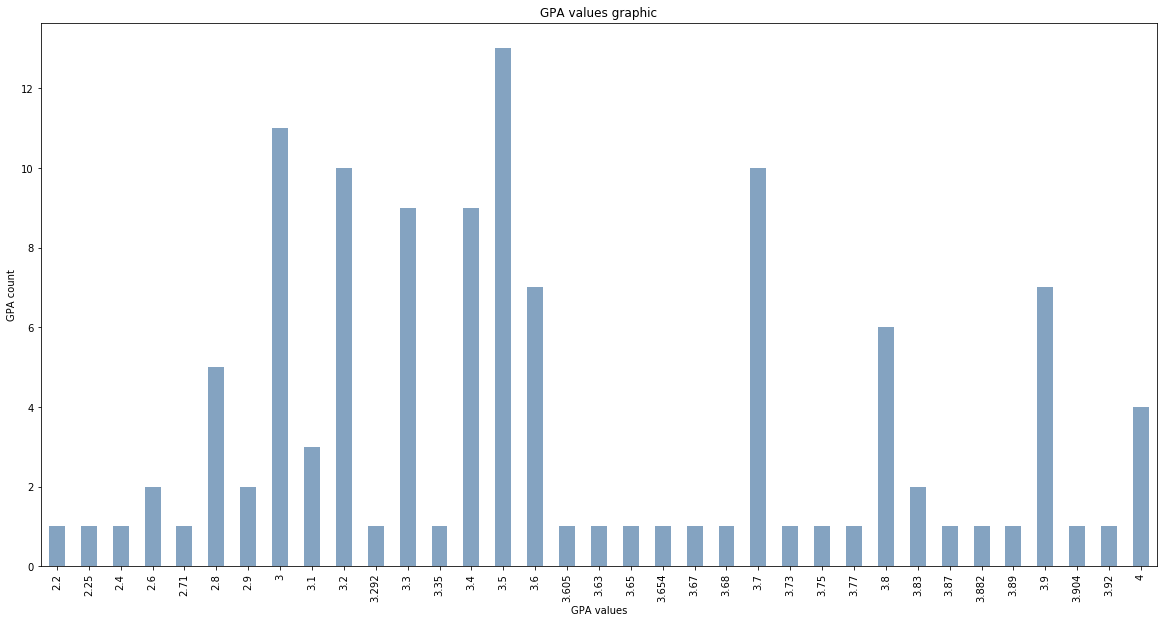

In [24]:
plt.figure(figsize=(20,10))
food_choices_gpadata = food_choices["GPA"].groupby([food_choices["GPA"]]).agg("count")
food_choices_gpadata.plot.bar(color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel("GPA values")
plt.ylabel("GPA count")
plt.title("GPA values graphic")
plt.show()

The bars are well visible. The data reminds slightly for normal distribution, but we also have some "high points" on the tail. I will make some further visualizations to compare the results with the median. 

Text(0,0.5,'GPA count')

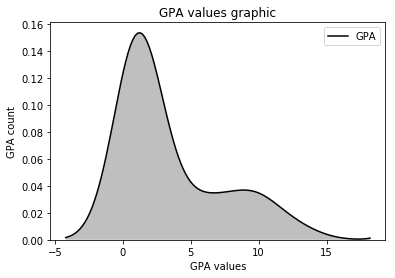

In [25]:
sns.kdeplot(food_choices_gpadata, shade=True, color = 'k')
plt.title("GPA values graphic")
plt.xlabel("GPA values")
plt.ylabel("GPA count")

In [26]:
food_choices_gpadata.describe()

count    35.000000
mean      3.428571
std       3.664502
min       1.000000
25%       1.000000
50%       1.000000
75%       5.500000
max      13.000000
Name: GPA, dtype: float64

In [27]:
food_choices_float = food_choices['GPA'].astype(float).dropna()

In [28]:
food_choices_float.median()

3.5

As we can see from the lines above, the median is bigger that the mean from the analyzed data ( 3.5 >3.43) . This usually means that data is "skewed to the left". 
<br><br> Thus I will also check the  coefficient of Skewness , which is a measure for the degree of symmetry in the variable distribution. It is less than 0 ( approximately -0.75) , which means the distribution is negatively skewed - skewed to the left. Shortly, this means that we have left asymetry.

In [30]:
food_choices_float.skew()

-0.7491500340988649

As a next step, I will go and check the coffee and gender variables. I will see if there is any connection between the gender and coffee consumption with the stated weight. We are all aware of the saying that caffeine helps reduction of weight. Let's see if this can help me for the goal of this project.

In [31]:
gender = food_choices["Gender"]

In [32]:
gender = food_choices.groupby('Gender').count()

In [33]:
gender.index = ['Female', 'Male']

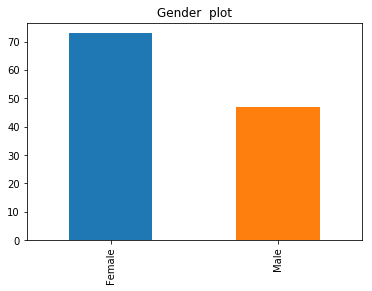

In [34]:
plt.title('Gender  plot')
gender['GPA'].plot.bar()

In [35]:
ratio = (food_choices[food_choices['Gender'] == 1]['Gender'].count())/(food_choices[food_choices['Gender'] == 2]['Gender'].count())
ratio

1.5416666666666667

More females have provided their evaluation than men.We have the value of the calculated ratio - 1.542. 

# Hypothesis testing

Next, I will perform a hypothesis testing.  I focused on 2 tests - T Test and Z tesrt. Both are quite similar, but Z test is used for samples with size greater than 30, as well as it refers to a univariate statistical analysis used to test the hypothesis that proportions from two independent samples differ greatly. 

I will use Z test ( please refer to the Resources sectuion for a link for more information for Z and T tests).

In [36]:
average = food_choices['GPA'].astype(float).dropna().mean()
average

3.4155583333333315

In [37]:
food_choices.weight.unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '210', '112', '144 lbs', '130', '127', '129',
       '260', '184', '138', '156'], dtype=object)

I will clear all non-numeric values for this column. Afterwards, I will be led by the average value from above , and divide into 2 groups - less and higher than the average.


In [38]:
food_choices = food_choices[food_choices['weight'] != "I'm not answering this. "]
food_choices = food_choices[food_choices['weight'] != "Not sure, 240"]
food_choices = food_choices[food_choices['weight'] != "144 lbs"]

In [39]:
high_group = food_choices[food_choices['GPA'].astype(float) > average]
lower_group = food_choices[food_choices['GPA'].astype(float) <= average]

In [40]:
high_group.head()

,GPA,Gender,breakfast,calories_chicken,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,comfort_food_reasons_coded.1,...,self_perception_weight,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
1,3.654,1,1,610,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,1,...,3.0,1.0,2,725.0,690,Basketball,4,2,900,155
4,3.5,1,1,720,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1,...,4.0,1.0,4,940.0,500,Softball,4,2,760,190
6,3.8,2,1,610,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,1,...,4.0,1.0,5,940.0,690,soccer,4,1,1315,180
10,3.5,1,1,610,980.0,2,"Pasta, grandma homemade chocolate cake anythin...",Boredom,2.0,2,...,1.0,1.0,2,940.0,345,soccer,5,2,900,116
11,3.904,1,1,720,420.0,2,"chocolate, pasta, soup, chips, popcorn","sadness, stress, cold weather",3.0,3,...,2.0,1.0,5,940.0,500,Running,5,1,900,110


In [41]:
high_group.shape

(62, 37)

In [42]:
lower_group.head()

,GPA,Gender,breakfast,calories_chicken,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,comfort_food_reasons_coded.1,...,self_perception_weight,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,315.0,1,none,we dont have comfort,9.0,9,...,3.0,1.0,1,1165.0,345,car racing,5,1,1315,187
5,2.25,1,1,610,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,4,...,5.0,2.0,4,940.0,345,None.,1,2,1315,190
7,3.3,1,1,720,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,1,...,3.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,2,...,4.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,1,...,3.0,1.0,4,580.0,345,field hockey,5,1,900,125


In [43]:
lower_group.shape

(55, 37)

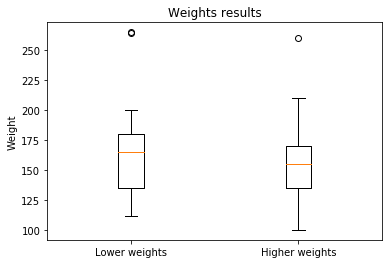

In [44]:
plt.boxplot([lower_group['weight'].astype(float).dropna(), high_group['weight'].astype(float)], labels = ["Lower weights", "Higher weights"])
plt.ylabel("Weight")
plt.title('Weights results')
plt.show()

Boxplot graphic gives me a good indication of how the values in the data are spread out. Although box lots may seem more basic in comparison to a histogram or density plot, they are very useful when comparing distributions between many groups or datasets.
<br> As in the previous section, I will again check the skew value here.

In [45]:
lower_group['weight'].skew()

1.043960686080514

In [46]:
high_group['weight'].skew()

0.696428265909459

As we can see, both groups have  a right asymetricity . Usually this is considered as a negative skew. To verify if this is our case also, I will perform a Z test ( this test is often used when the study is based on standard normal distribution, and for any statistical test for which the distribution of the test statistic under the null hypothesis can be approximated by a normal distribution). 

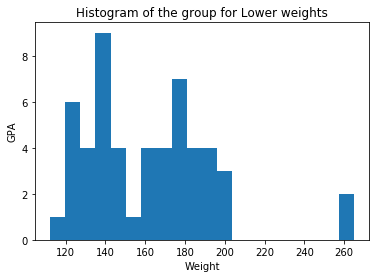

In [51]:
plt.hist(lower_group['weight'].astype(float).dropna(), bins = 20)
plt.title('Histogram of the group for Lower weights')
plt.xlabel('Weight')
plt.ylabel('GPA')
plt.show()

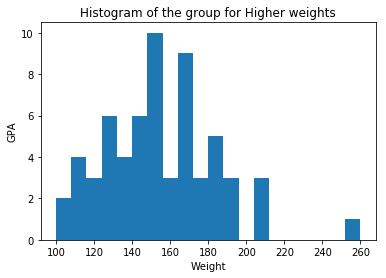

In [52]:
plt.hist(high_group['weight'].astype(float).dropna(), bins = 20)
plt.title('Histogram of the group for Higher weights')
plt.xlabel('Weight')
plt.ylabel('GPA')
plt.show()

From the two histograms above we can see that the group for lower_group  has distribution closer to the normal one, rather than the high_group. The high_group has one point at level 260, which might be random - we should not forget, that we use data for weights, based on everyone's personal evaluation, which means that it is not verified. 
<br> Now let's continue with the actiual Z-test.
<br> The null hypothesis H0 is that there is no difference, the alternative H1 hypothesis there is a difference. I assume a normal distribution of the variables.

In [49]:
z, p = weightstats.ztest(lower_group['weight'].astype(float).dropna(),high_group['weight'].astype(float))

In [50]:
z, p

(1.198032632958527, 0.23090431307306936)

We have the following 2 values as an outcome :
<br>  z = 1.198032632958527
<br>  p = 0.23090431307306936
<br>Since p>0.05, I can conclude that the H0 is the correct one ( we don't have a difference). However, for more accurate results I will take greater sample, make the test again and focus on the strict distributions that present. I will have to evaluate further .

# Conclusion

I analyzed the file, lead by the hypothesis to find the impact of GPA on people's weight . I started with cleaning the data, finding the correlation between part of the columns, then checking the distribution and reaching to the conclusion that the disctribution is negatively skewed. 

<br> I continued with performing a Ztest ( chosen over T test, as the Ztest is based on standard normal distribution which I have already analyzed). As a result, it turned out that the GPA has negative impact on people's weight ( at least what was stated). 

# Further development

As next step, I can find the relation between the coffee choice , gender and weight, and check if there is any trend there.Trend should be matched to the values of GPA. We all know that caffeine can help for weight reduction , and I could test this and track if it differs for men and women. I would use also another dataset with more objective data  for the weight and caffeine values both in food and drinks.
<br> I could also test the relation between healthy feeling and calories, and track of there is any specific trend or food which leads to happier feeling. 
<br> This dataset is indeed not the biggest one, but provides a lot of opportunities for analysis.

# Resources:
<br> 1.Source of the datasets - www.kaggle.com
<br> 2.Difference between T & Z-tests --> https://keydifferences.com/difference-between-t-test-and-z-test.html
<br> 3.Youtube channels - wwww.youtube.com
<br> 4. Correlation coefficient - https://www.investopedia.com/terms/c/correlationcoefficient.asp
<br> 4. Seaborn documentation - https://seaborn.pydata.org/tutorial.html
<br> 5. Z and T test information - https://keydifferences.com/difference-between-t-test-and-z-test.html
<br> 6. Skewness information - https://www.medcalc.org/manual/skewnesskurtosis.php ; https://de.wikipedia.org/wiki/Schiefe_(Statistik)